# Maps in shapefile and JSON format

This notebook explores the potential of "shapefile" maps based on the "polygonfile" library

Contents:
1. Basic map information loaded from official sources (e.g. Eurostat) in shapefile format. This procedure may load much more data than is actually needed (e.g. a country may be composed by a number of small shapes that are not relevant for the application; we may be interested in a small number of coutntries...)

2. A basic code to plot a map controlling border and fill color (from SHAPEFILE)

3. Filter the dataset (e.g. only some selected countries) and save in JSON format for further use 

4. An efficient function to plot a map controlling border and fill color  (from JSON)

 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load data on italian minicipalities and regions

In [2]:
df = pd.read_csv('./data/Elenco-comuni-italiani.csv', sep=";", dtype='str')
cols_to_use = ['Codice Regione', 'Codice Comune formato alfanumerico' ,'Denominazione in italiano']
df = df[ cols_to_use ]
df.columns = ['cod_regione', 'cod_comune', 'nome_comune']
df = df[ df['cod_regione']== '06' ] # regione FVG
selected_codes = df.cod_comune.to_list()

#df

# load data from shapefile .shp

In [3]:
import shapefile as shp

#local path:  maps\ITA\Com01012022\Com01012022_WGS84.shp
shp_path = r"./maps/ITA/Com01012022/Com01012022_WGS84.shp"
sf = shp.Reader(shp_path)
shapeRecs = sf.shapeRecords()
n_shapes = len(shapeRecs)
print("Number of shapes loades: ",n_shapes)


Number of shapes loades:  7904


In [4]:
data_to_plot = pd.DataFrame(columns = ['code', 'name', 'xc','yc','polygon'])

for sh_id in range(n_shapes):
        code = shapeRecs[sh_id].record[6]
        
        if code in selected_codes:

                new_row = {     'code':  code, 
                                'name': shapeRecs[sh_id].record[7],
                                'xc':   shapeRecs[sh_id].record[10],
                                'yc':   shapeRecs[sh_id].record[11],
                                'polygon': sf.shape(sh_id).points[:]}
                        
                data_to_plot = data_to_plot.append(new_row, ignore_index = True)

     
data_to_plot

,code,name,xc,yc,polygon
0,030031,Coseano,2.377866e+07,32593.191835,"[(807808.0810000002, 5114406.4037), (807896.14..."
1,030039,Flaibano,1.734145e+07,22340.097097,"[(809353.1775000002, 5110363.8957), (809365.20..."
2,030109,Sedegliano,5.042197e+07,33902.453904,"[(807512.8086999999, 5107194.6735), (807529.86..."
3,031019,San Floriano del Collio,1.063112e+07,23516.622342,"[(856142.2419999996, 5102981.9461), (856230.67..."
4,032005,Sgonico,3.140242e+07,27362.801326,"[(868280.7094999999, 5078475.613700001), (8682..."
...,...,...,...,...,...
210,093047,Travesio,2.837903e+07,31162.680324,"[(796771.9813000001, 5127587.317), (796865.105..."
211,093027,Montereale Valcellina,6.788023e+07,44866.551215,"[(777588.5476000002, 5121490.3741), (777676.10..."
212,093028,Morsano al Tagliamento,3.253309e+07,32673.855601,"[(802758.8589000003, 5089974.6612), (802864.23..."
213,093030,Pinzano al Tagliamento,2.195082e+07,25249.596074,"[(803726.6797000002, 5125132.83), (803762.6791..."


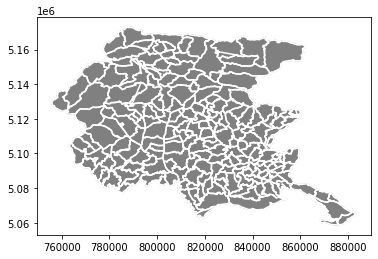

In [5]:
for index, row in data_to_plot.iterrows():
    coords = list(zip(*row.polygon))
    
    plt.plot(coords[0],coords[1], c="white")
    plt.fill(coords[0],coords[1], c="gray", alpha=1)


plt.show()


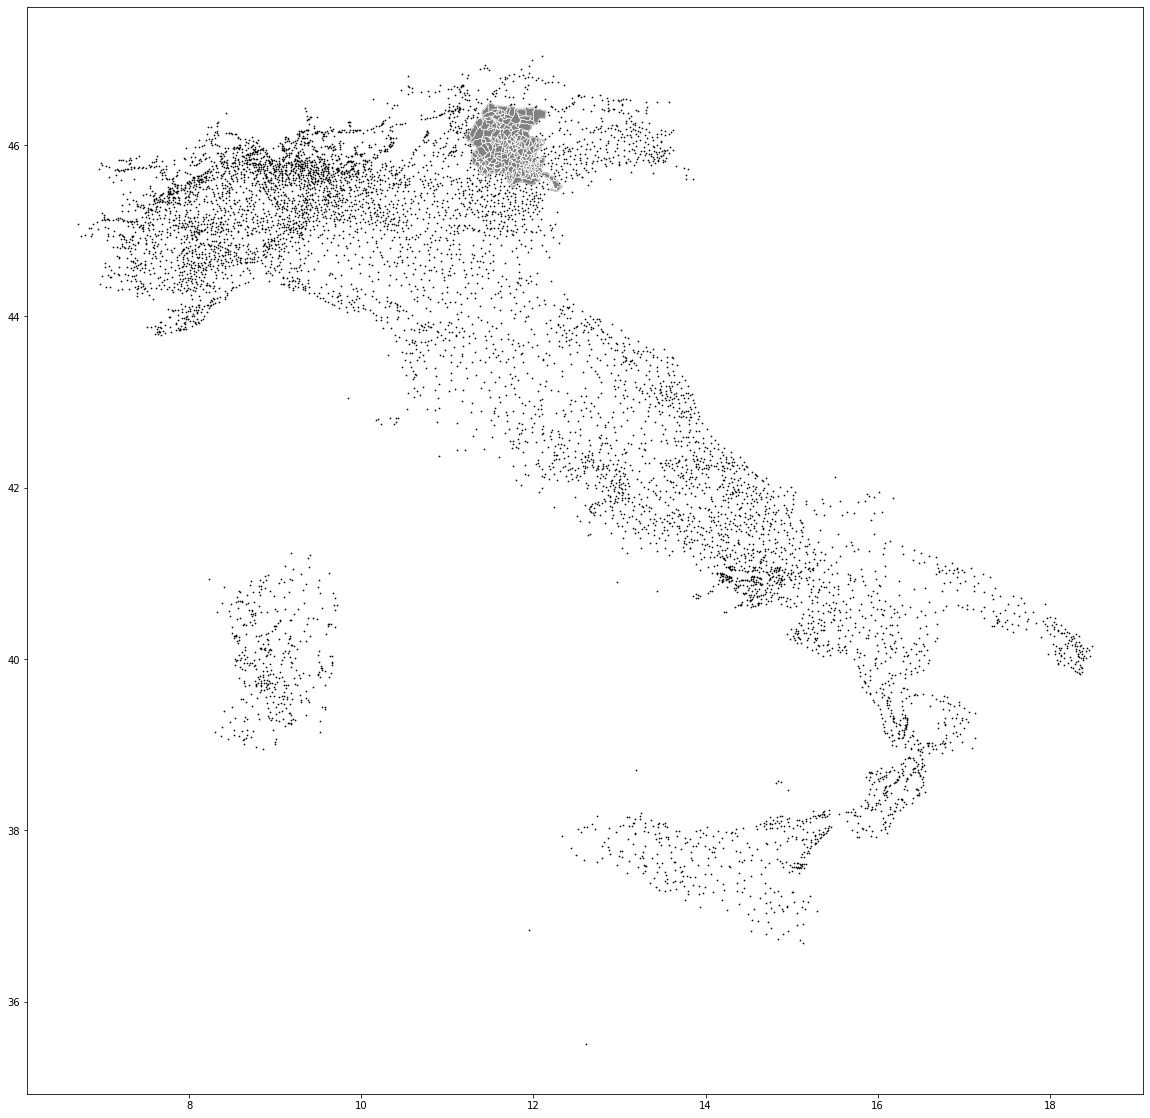

In [61]:

from pyproj import Transformer
transformer = Transformer.from_crs("epsg:3857","epsg:4326")

fix,ax = plt.subplots(figsize=(20,20))
for index, row in data_to_plot.iterrows():
    coords = list(zip(*row.polygon))
    y = np.array(coords[0])
    y = (y +500000)/0.9996
    x = np.array(coords[1])
    x=x/0.9996
    lon, lat = transformer.transform(x, y)
    plt.plot(lon,lat, c="white",linewidth=0.5)
    plt.fill(lon,lat, c="gray", alpha=1)
    
points = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
x = points.lng
y = points.lat
plt.scatter(x=x, y=y,s=2, c="black", marker=".")
     
 

In [37]:
lon, lat

(array([41.53971257, 41.53603456, 41.53527471, 41.53423243, 41.533328  ,
        41.53304221, 41.53262193, 41.5319293 , 41.53099121, 41.53194946,
        41.52971685, 41.52818021, 41.52678475, 41.52646867, 41.52548678,
        41.5254695 , 41.52544099, 41.5251707 , 41.52458558, 41.52405092,
        41.52426613, 41.52359022, 41.52321695, 41.52232918, 41.52188196,
        41.52155909, 41.52128333, 41.52096723, 41.52060404, 41.52049306,
        41.52037535, 41.52034845, 41.52029801, 41.52005252, 41.51980703,
        41.51952118, 41.51911426, 41.51878468, 41.51854591, 41.51807172,
        41.5177186 , 41.51746302, 41.51662224, 41.51629602, 41.51606396,
        41.51563348, 41.51551241, 41.51534761, 41.51490704, 41.51466152,
        41.51443955, 41.51431847, 41.51407296, 41.51372318, 41.51333641,
        41.51288236, 41.51278483, 41.51292945, 41.5128521 , 41.51260658,
        41.5124485 , 41.51214243, 41.51192046, 41.51184982, 41.51185991,
        41.51177247, 41.51144958, 41.51111324, 41.5

In [29]:
print(lon,lat)

(41.53971257051481, 41.536034564228736, 41.53527471002492, 41.534232434390006, 41.533327995442505, 41.53304220539453, 41.532621930422174, 41.53192929694047, 41.53099120938076, 41.531949458157136, 41.529716852209354, 41.52818020945061, 41.52678474610419, 41.52646866696938, 41.52548678354472, 41.52546949741324, 41.52544098668565, 41.52517069537894, 41.52458558301884, 41.52405091862687, 41.52426612973723, 41.52359022466232, 41.523216950486194, 41.522329178418154, 41.521881959935556, 41.52155909344315, 41.52128333199247, 41.520967225983185, 41.52060403687518, 41.52049305566675, 41.52037535378253, 41.52034845165609, 41.52029800963444, 41.52005252012869, 41.5198070296917, 41.51952117856881, 41.51911426035811, 41.518784684965375, 41.51854591174044, 41.51807172368296, 41.517718600813694, 41.51746301899667, 41.51662223633468, 41.516296024176924, 41.51606396404964, 41.515633481175925, 41.515512407940385, 41.51534761161925, 41.514907041056155, 41.51466151630321, 41.514439548113344, 41.51431847264

In [23]:
P3857 = Proj(init='epsg:3857') #https://epsg.io/3857?msclkid=5835fb71b01911ecb617f1cbcb8093c3
P4326 = Proj(init='epsg:4326') #lat long
lo=13.0
la=46.0
xx, yy = transform( P4326,P3857,  lo, la)
xx,yy

C:\Users\morea\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\morea\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\morea\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<a

(1447153.3803125564, 5780349.220256351)